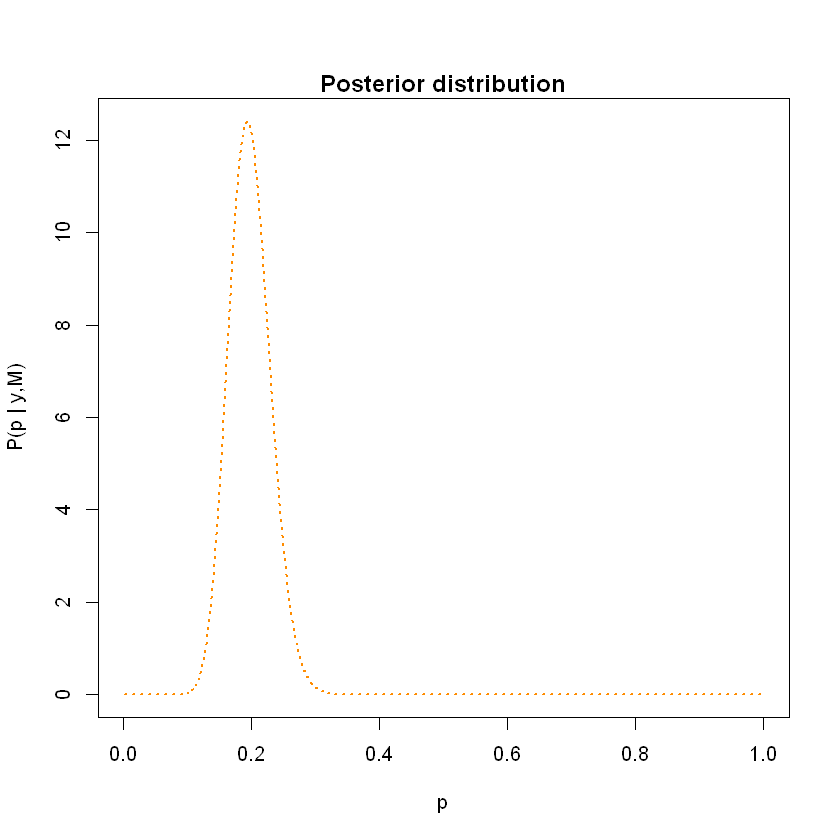

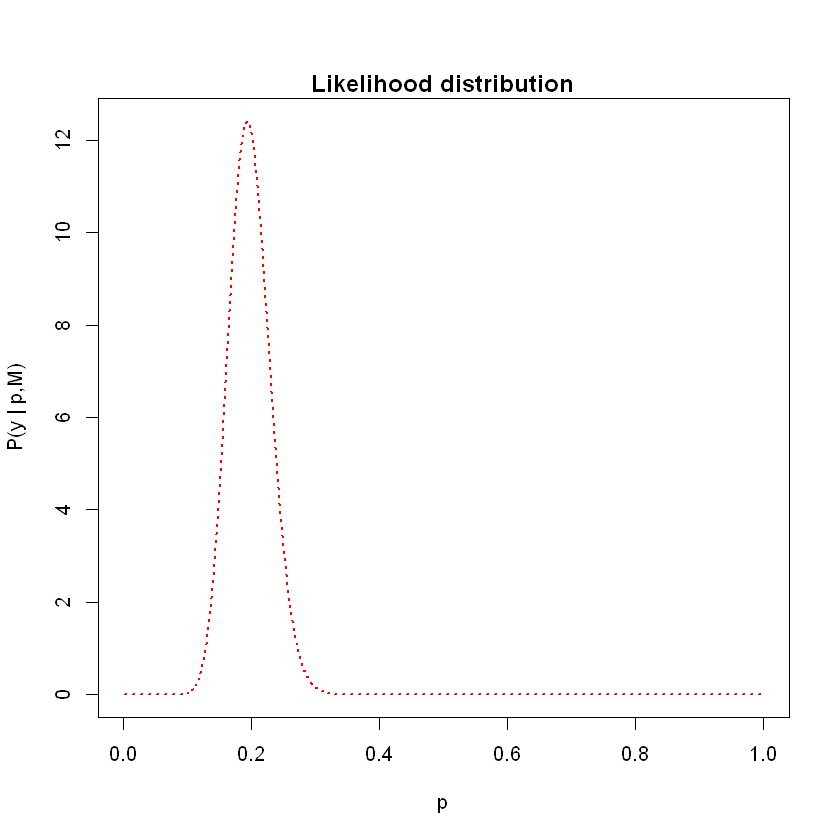

In [3]:
#Exercise 1

#Question a: I would assume a binomial distribution dbinom(y, size=n, prob=p) 
#Question b: Assuming a uniform prior U[0,1] the posterior distribution for y is identical to the likelihood (->Beta Distr.)

n.sample<-2000
delta.p<-1/n.sample
p<-seq(from=1/(2*n.sample), by=1/n.sample , length.out=n.sample)

alpha<-1
beta<-1
n<-150
y<-29


prior<-dbeta(p, alpha, beta)                                         #Question c
likelihood<-dbeta(p, alpha+y, beta+n-y)    
posterior<-dbeta(p, alpha+y, beta+n-y)  

plot(p, posterior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p | y,M)"),)
title(main="Posterior distribution", line=0.3, cex.main=1.2)
plot(p, likelihood, type="l", xlim=c(0,1), col="red", lwd=2, lty=3, xlab="p", ylab=paste("P(y | p,M)"),)
title(main="Likelihood distribution", line=0.3, cex.main=1.2)

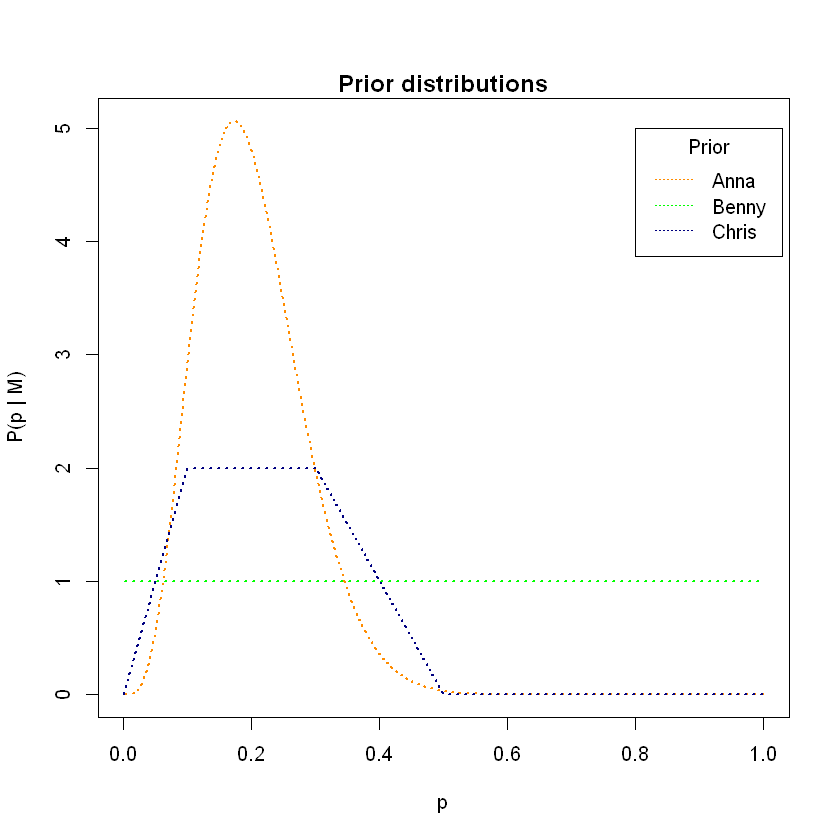

Anna's estimate of the most probable value: 0.24425 with 95% credibility interval from 0.00025 to 0.31375
Benny's estimate of the most probable value: 0.26025 with 95% credibility interval from 0.00025 to 0.33825
Chris's estimate of the most probable value: 0.26025 with 95% credibility interval from 0.00025 to 0.33175

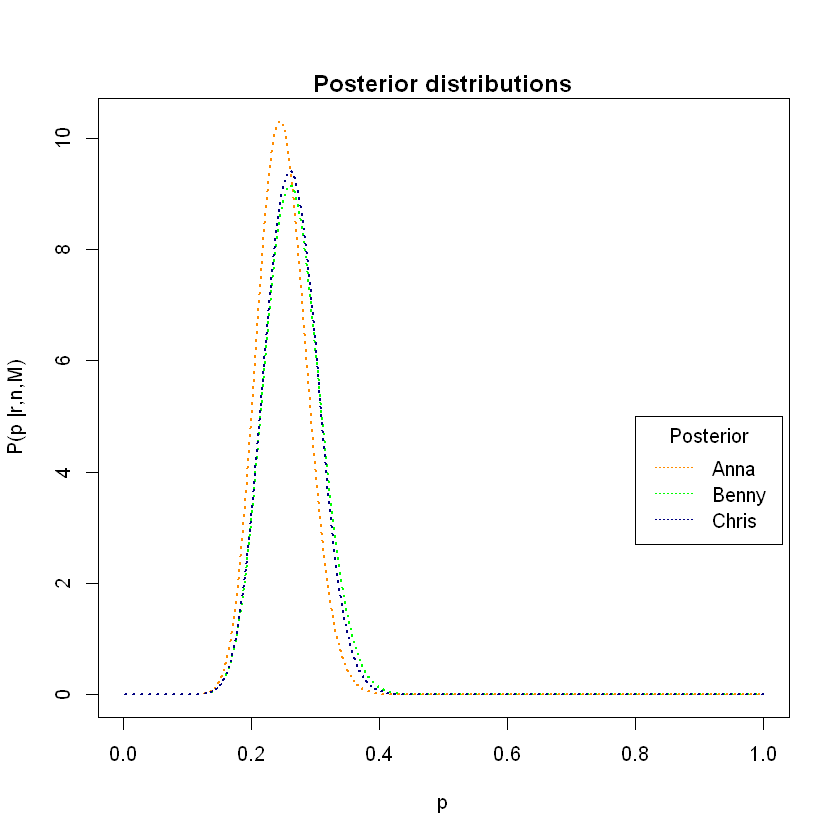

In [18]:
#Exercise 2

n.sample<-2000
delta.p<-1/n.sample
p<-seq(from=1/(2*n.sample), by=1/n.sample , length.out=n.sample)

m<-0.2
sigma<-0.08
var<-sigma^2
alpha<-(m/var)*(m-m^2-var)
beta<-((1-m)/var)*(m-m^2-var)



anna.prior<-dbeta(p, alpha, beta)
benny.prior<-dbeta(p, 1, 1)
chris.prior<-function(x){
    ifelse(x<0.1, 20*x,
          ifelse(x>=0.1&x<0.3, 2,
                ifelse(x>=0.3&x<0.5, 5-10*x, 0)))
}
plot(p, anna.prior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p | M)"),)
lines(p, benny.prior, col="green", lwd=2, lty=3)
lines(p, chris.prior(p) , col="navy", lwd=2, lty=3)
title(main="Prior distributions", line=0.3, cex.main=1.2)
legend(0.8, 5, legend=c("Anna", "Benny", "Chris"), col=c("darkorange", "green", "navy"), lty=3, title="Prior")



r<-26
n<-100
anna.posterior<-dbeta(x=p, alpha+r, beta+n-r)
benny.posterior<-dbeta(x=p, 1+r, 1+n-r)
chris.posterior<-(dbinom(x=r, size=n, prob=p)*chris.prior(p))/(delta.p*sum(dbinom(x=r, size=n, prob=p)*chris.prior(p)))
plot(p, anna.posterior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p |r,n,M)"),)
lines(p, benny.posterior, col="green", lwd=2, lty=3)
lines(p, chris.posterior , col="navy", lwd=2, lty=3)
title(main="Posterior distributions", line=0.3, cex.main=1.2)
legend(0.8, 5, legend=c("Anna", "Benny", "Chris"), col=c("darkorange", "green", "navy"), lty=3, title="Posterior")


mode<-function(posterior){
    p[match(max(posterior), posterior)]
}
CI<-function(posterior){
    for(i in 1:2000){
        S<-delta.p*sum(head(posterior, -i))
        if(ceiling(S*100)==95){
            index<-2000-i
            return(index)
            break
        }
    }
}
cat("Anna's estimate of the most probable value:", mode(anna.posterior), "with 95% credibility interval from", 
    p[1], "to", p[CI(anna.posterior)])
cat("\nBenny's estimate of the most probable value:", mode(benny.posterior), "with 95% credibility interval from", 
    p[1], "to", p[CI(benny.posterior)])
cat("\nChris's estimate of the most probable value:", mode(chris.posterior), "with 95% credibility interval from", 
    p[1], "to", p[CI(chris.posterior)])

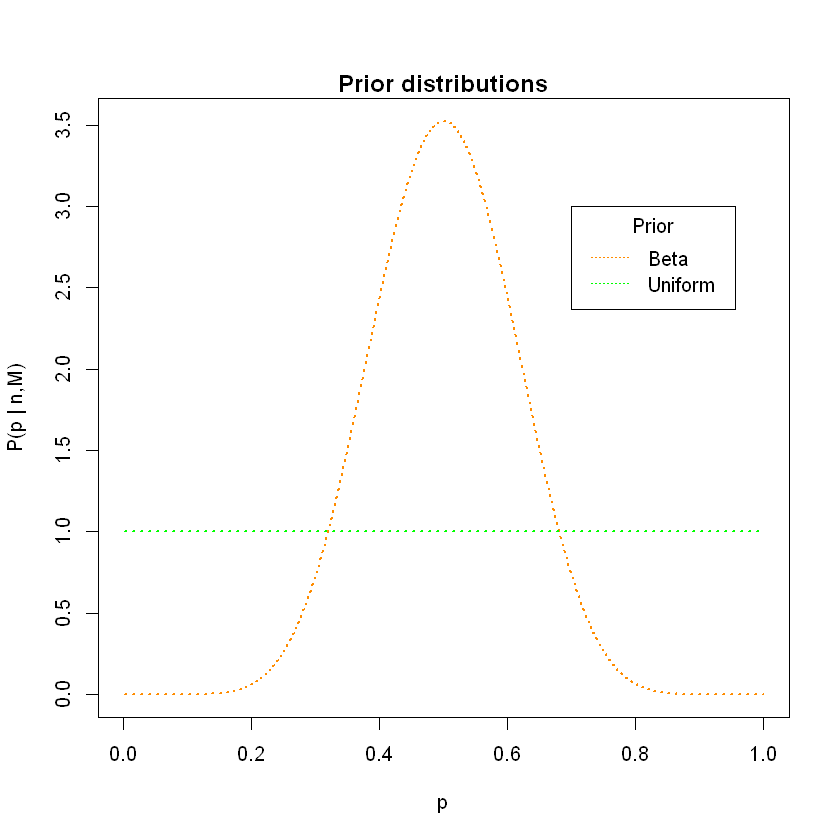

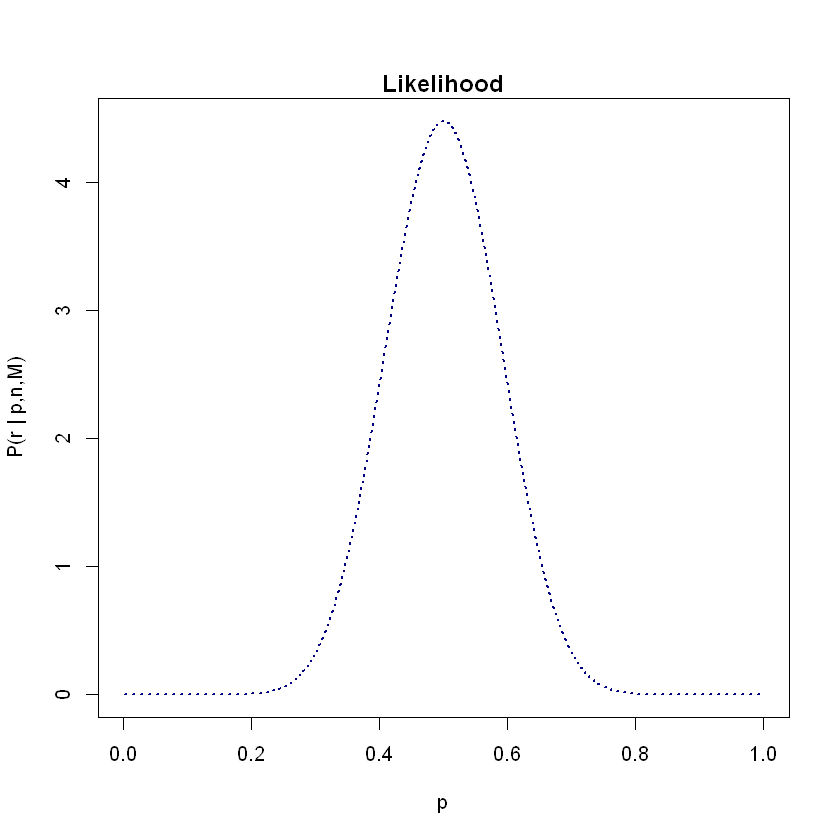

Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.49975 
95% credibility interval from 0.00025 to 0.61475

Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.49975 
95% credibility interval from 0.00025 to 0.64275

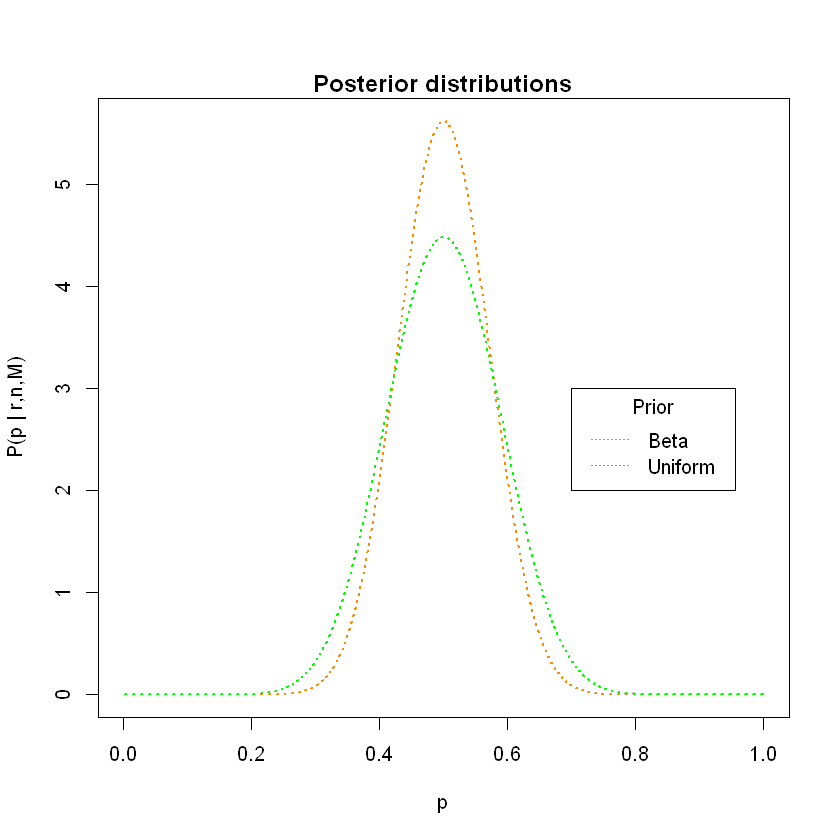

In [22]:
#Exercise 3

n.sample<-2000
delta.p<-1/n.sample
p<-seq(from=1/(2*n.sample), by=1/n.sample , length.out=n.sample)

alpha1<-10
beta1<-10
alpha2<-1
beta2<-1
r<-15
n<-30



beta.prior<-dbeta(p, alpha1, beta1)           #Question a
uniform.prior<-dbeta(p, alpha2, beta2)
plot(p, beta.prior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p | n,M)"))
lines(p, uniform.prior, col="green", lwd=2, lty=3)
title(main="Prior distributions", line=0.3, cex.main=1.2)
legend(0.7, 3, legend=c("Beta", "Uniform"), col=c("darkorange", "green"), lty=3, title="Prior")

likelihood<-dbeta(p, r+1, n-r+1)
plot(p, likelihood, type="l", xlim=c(0,1), col="navy", lwd=2, lty=3, xlab="p", ylab=paste("P(r | p,n,M)"))
title(main="Likelihood", line=0.3, cex.main=1.2)

beta.posterior<-dbeta(x=p, alpha1+r, beta1+n-r)
uniform.posterior<-dbeta(x=p, alpha2+r, beta2+n-r)
plot(p, beta.posterior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p | r,n,M)"))
lines(p, uniform.posterior, col="green", lwd=2, lty=3)
title(main="Posterior distributions", line=0.3, cex.main=1.2)
legend(0.7, 3, legend=c("Beta", "Uniform"), col=c("darkorange", "green"), lty=3, title="Prior")



mode<-function(posterior){                             #Question b
    p[match(max(posterior), posterior)]
}
CI<-function(posterior){
    for(i in 1:2000){
        S<-delta.p*sum(head(posterior, -i))
        if(ceiling(S*100)==95){
            index<-2000-i
            return(index)
            break
        }
    }
}
cat("Beta Prior")
cat("\nMost probable value for the coin probability p (=probability of getting head in one toss):", mode(beta.posterior), 
    "\n95% credibility interval from", p[1], "to", p[CI(beta.posterior)])
cat("\n\nUniform Prior")
cat("\nMost probable value for the coin probability p (=probability of getting head in one toss):", mode(uniform.posterior), 
    "\n95% credibility interval from", p[1], "to", p[CI(uniform.posterior)])



Number of coin tosses n=1
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.47375 
95% credibility interval from 0.00025 to 0.65275
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.00025 
95% credibility interval from 0.00025 to 0.77575

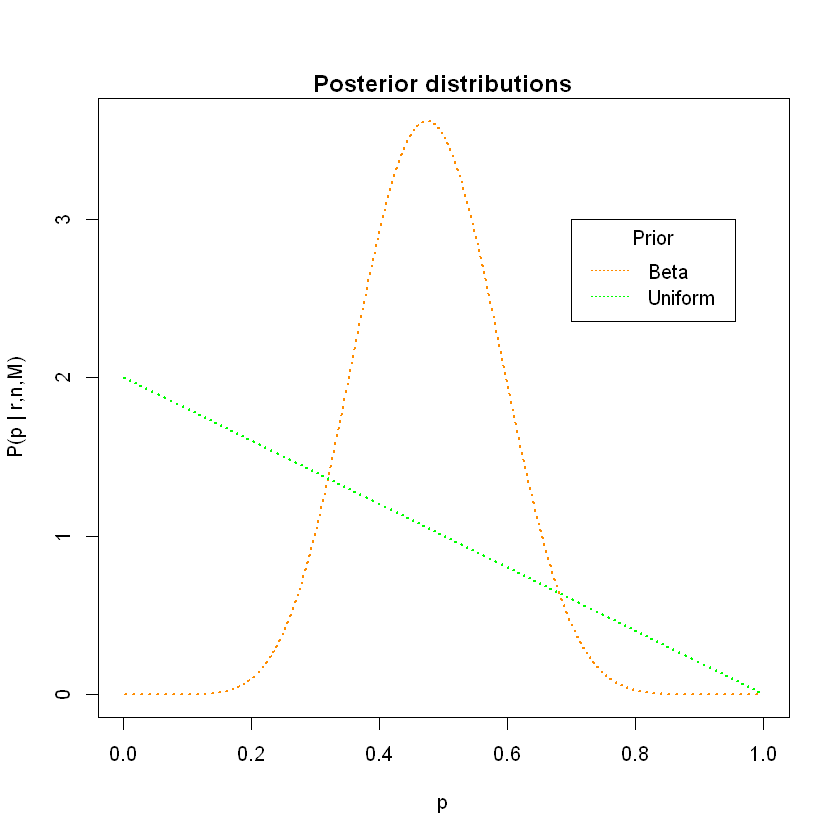



Number of coin tosses n=2
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45025 
95% credibility interval from 0.00025 to 0.62775
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.00025 
95% credibility interval from 0.00025 to 0.63125

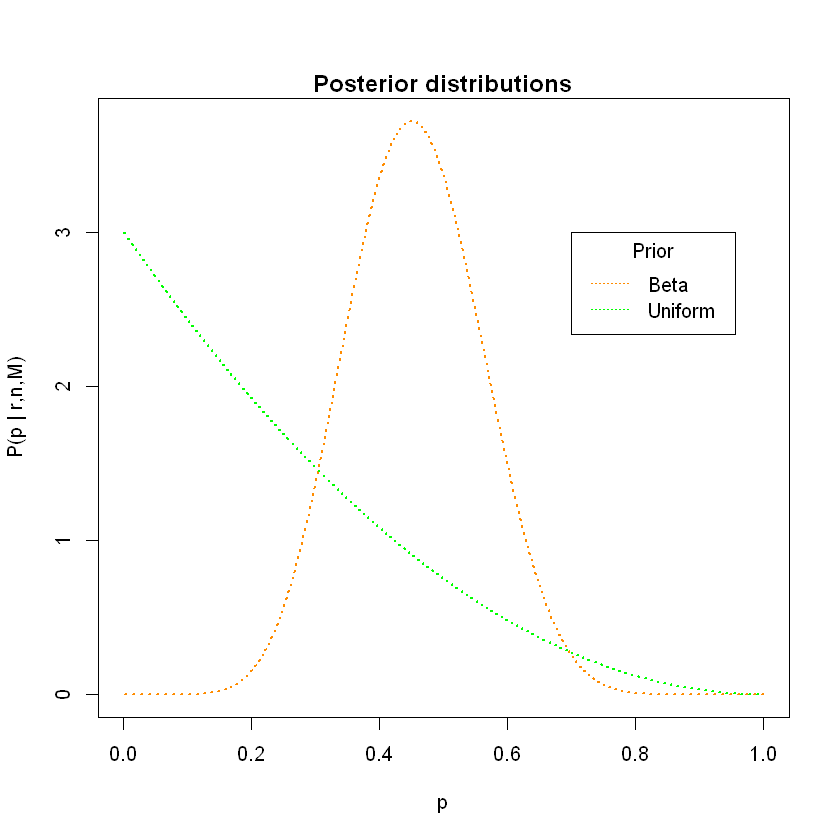



Number of coin tosses n=3
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.42875 
95% credibility interval from 0.00025 to 0.60425
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.00025 
95% credibility interval from 0.00025 to 0.52675

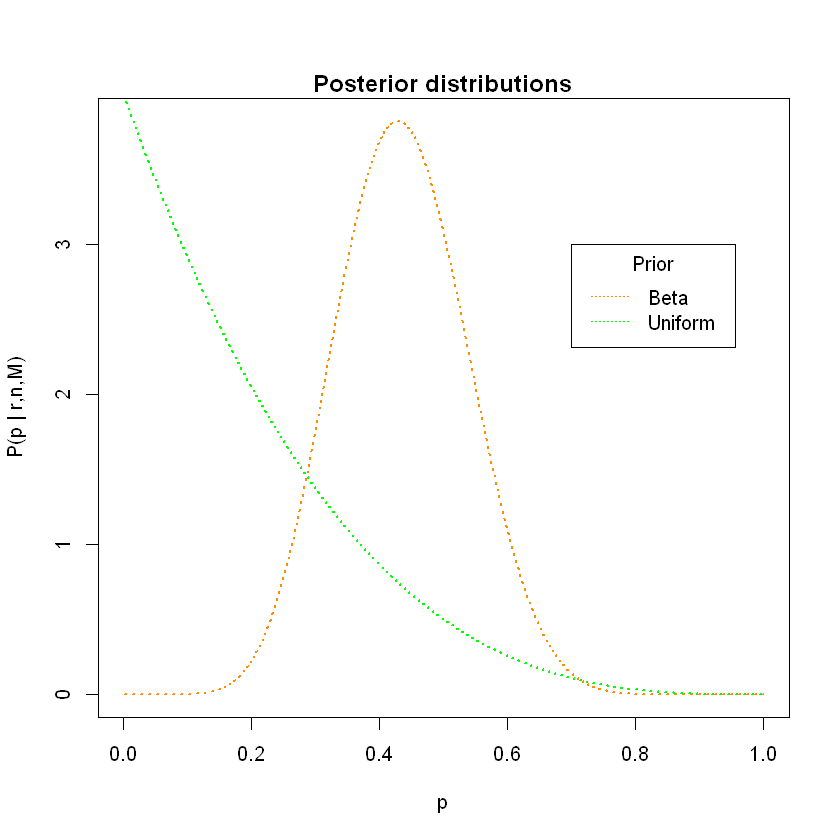



Number of coin tosses n=4
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40925 
95% credibility interval from 0.00025 to 0.58275
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.00025 
95% credibility interval from 0.00025 to 0.45025

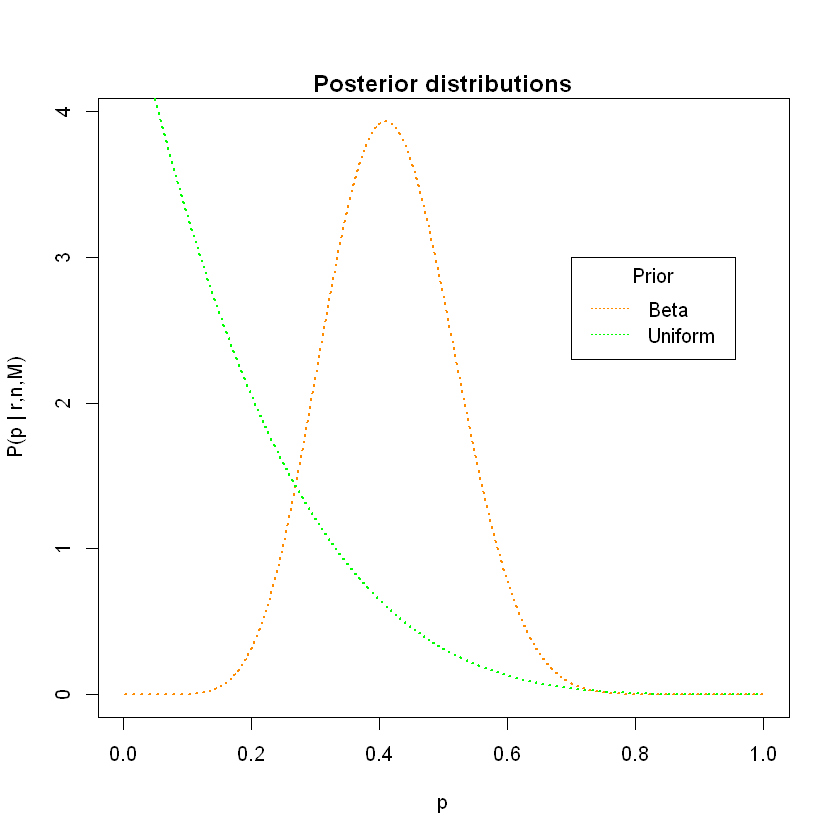



Number of coin tosses n=5
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.39125 
95% credibility interval from 0.00025 to 0.56225
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.00025 
95% credibility interval from 0.00025 to 0.39275

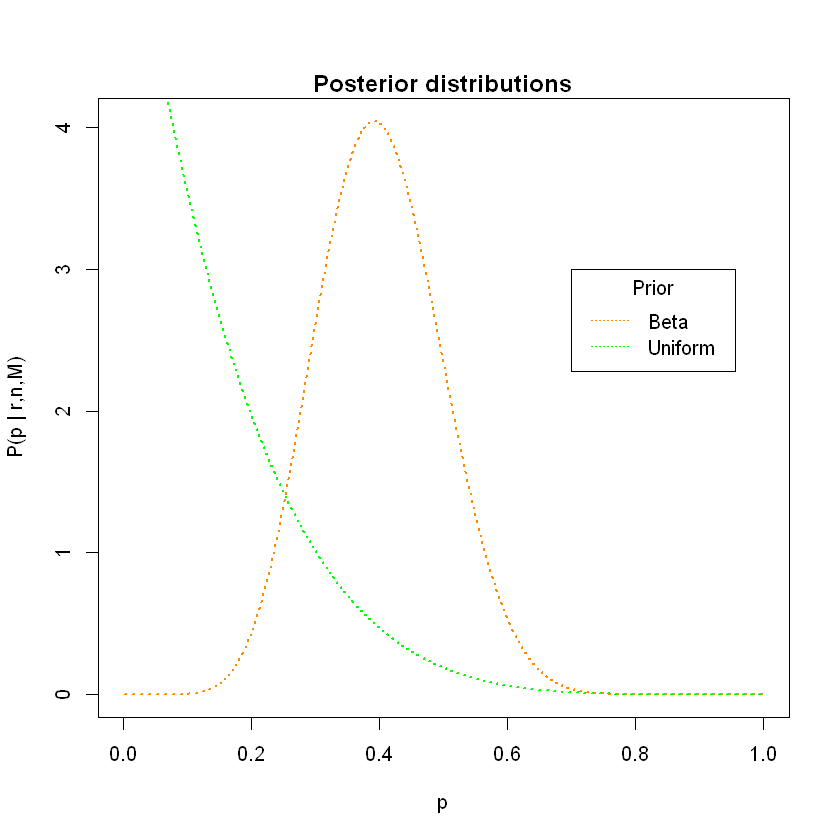



Number of coin tosses n=6
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.41675 
95% credibility interval from 0.00025 to 0.58275
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.16675 
95% credibility interval from 0.00025 to 0.52025

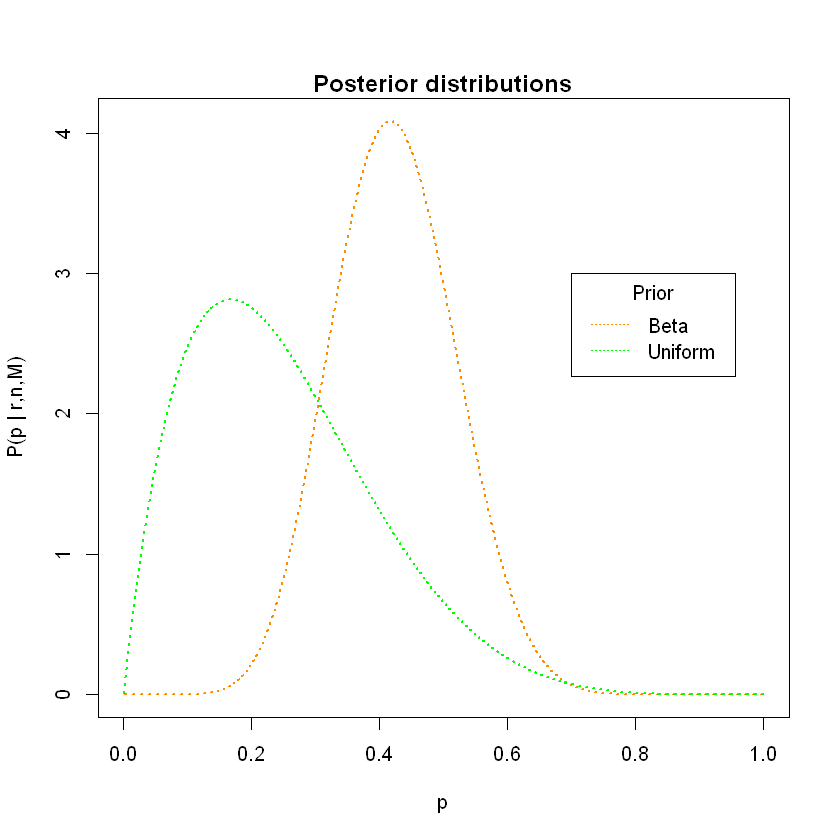



Number of coin tosses n=7
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40025 
95% credibility interval from 0.00025 to 0.56375
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.14275 
95% credibility interval from 0.00025 to 0.47025

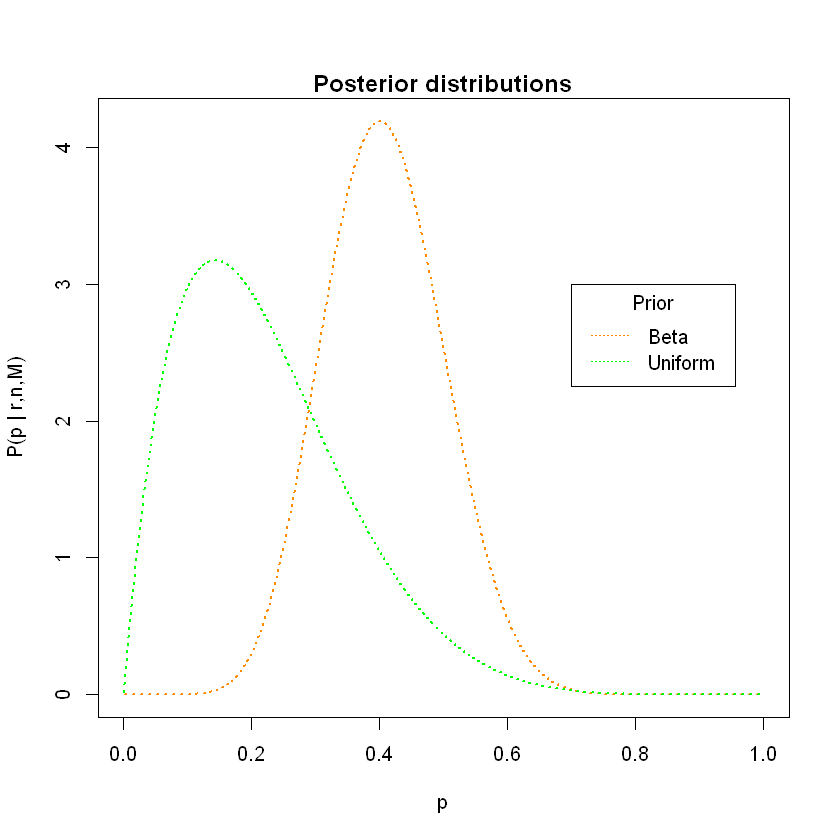



Number of coin tosses n=8
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.38475 
95% credibility interval from 0.00025 to 0.54625
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.12525 
95% credibility interval from 0.00025 to 0.42875

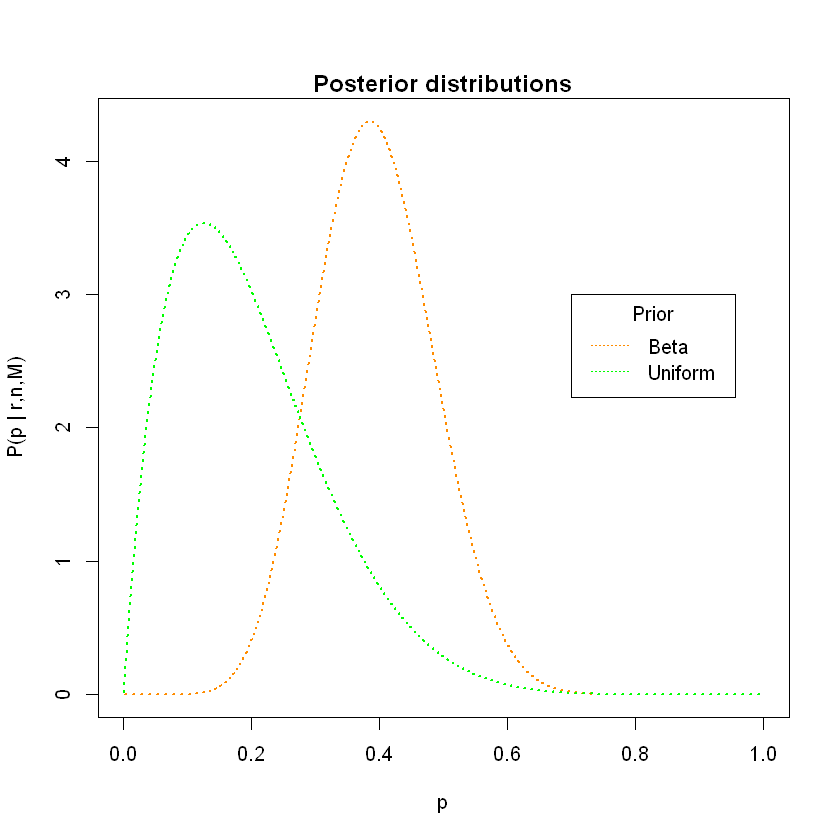



Number of coin tosses n=9
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40725 
95% credibility interval from 0.00025 to 0.56475
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.22225 
95% credibility interval from 0.00025 to 0.50625

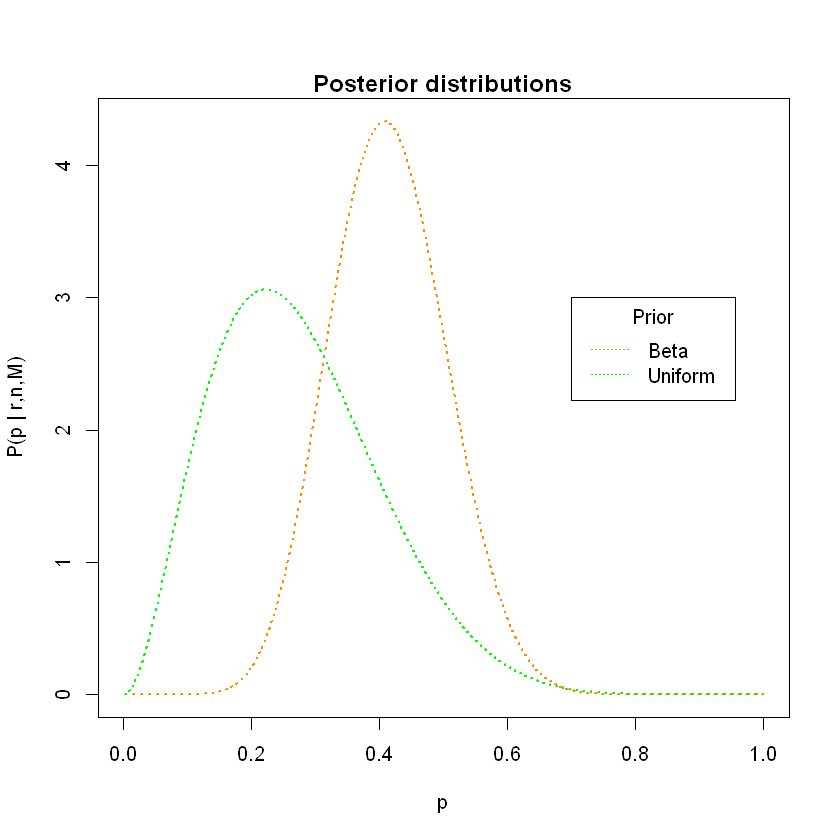



Number of coin tosses n=10
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.42875 
95% credibility interval from 0.00025 to 0.58225
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.30025 
95% credibility interval from 0.00025 to 0.56375

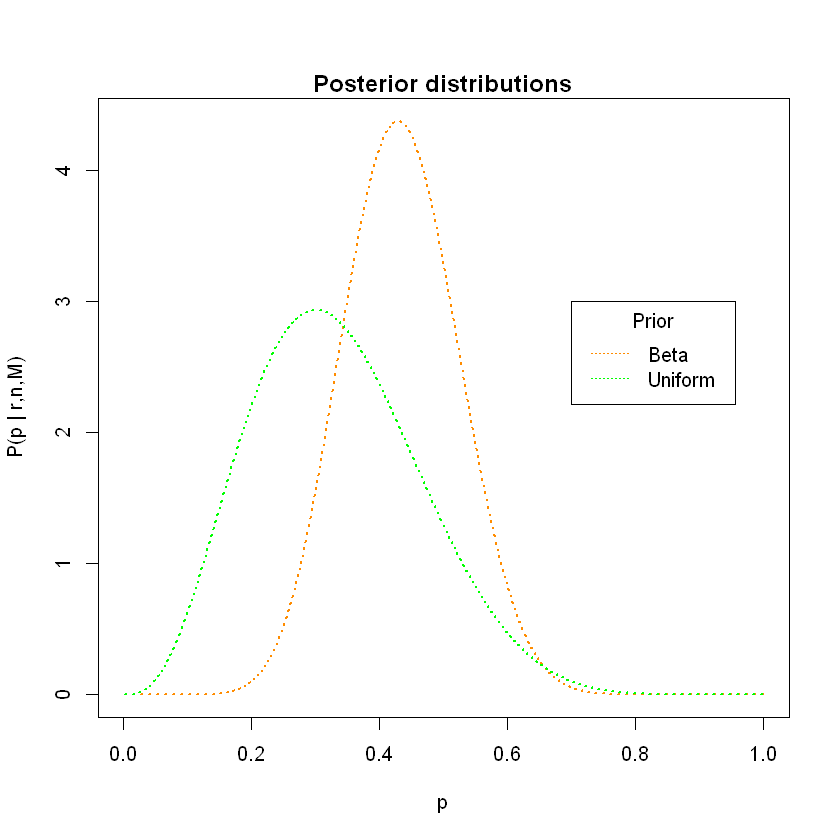



Number of coin tosses n=11
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.41375 
95% credibility interval from 0.00025 to 0.56575
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.27275 
95% credibility interval from 0.00025 to 0.52675

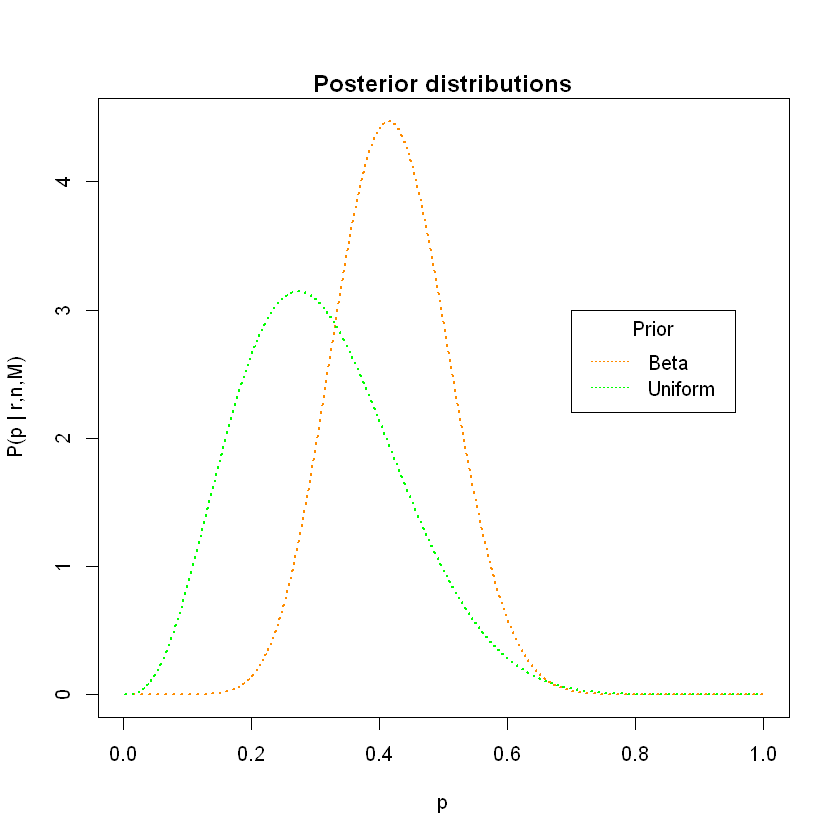



Number of coin tosses n=12
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40025 
95% credibility interval from 0.00025 to 0.54975
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.25025 
95% credibility interval from 0.00025 to 0.49425

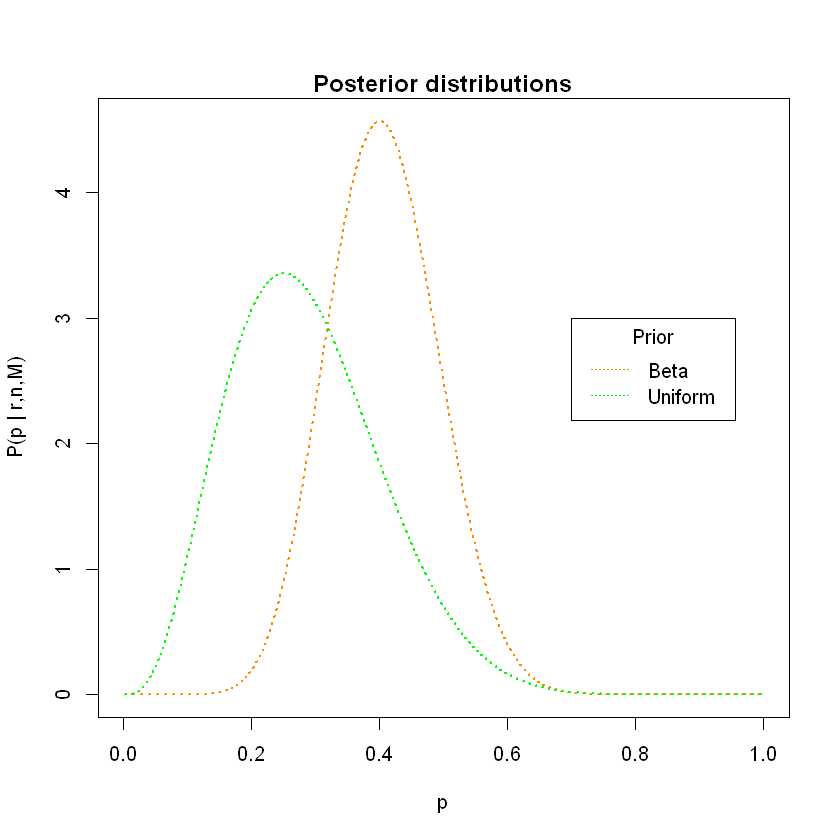



Number of coin tosses n=13
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.41925 
95% credibility interval from 0.00025 to 0.56625
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.30775 
95% credibility interval from 0.00025 to 0.53975

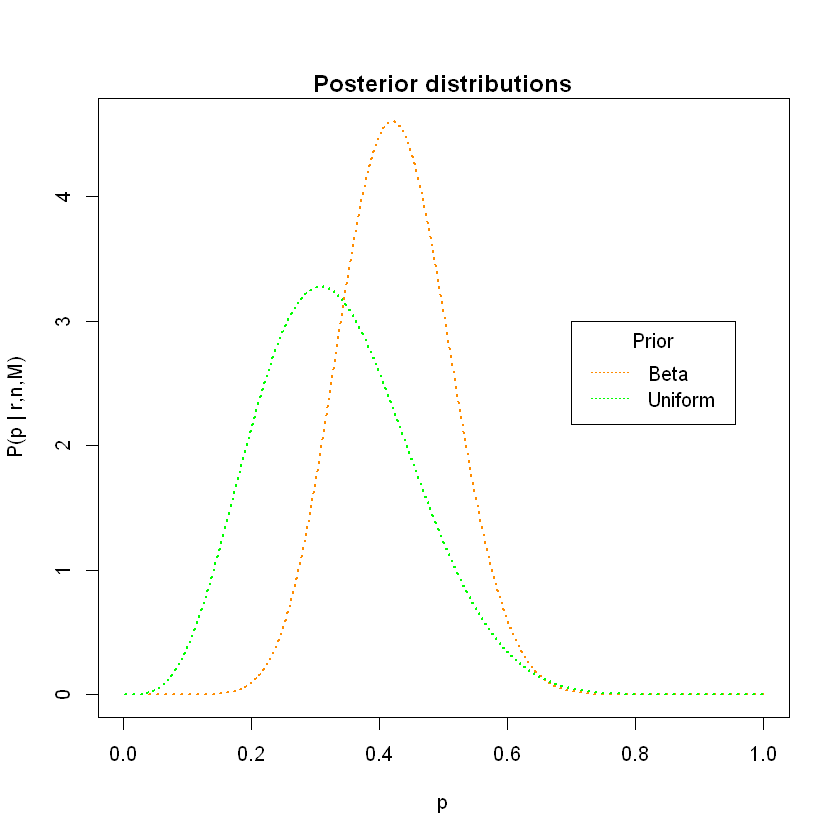



Number of coin tosses n=14
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.43775 
95% credibility interval from 0.00025 to 0.58075
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.35725 
95% credibility interval from 0.00025 to 0.57675

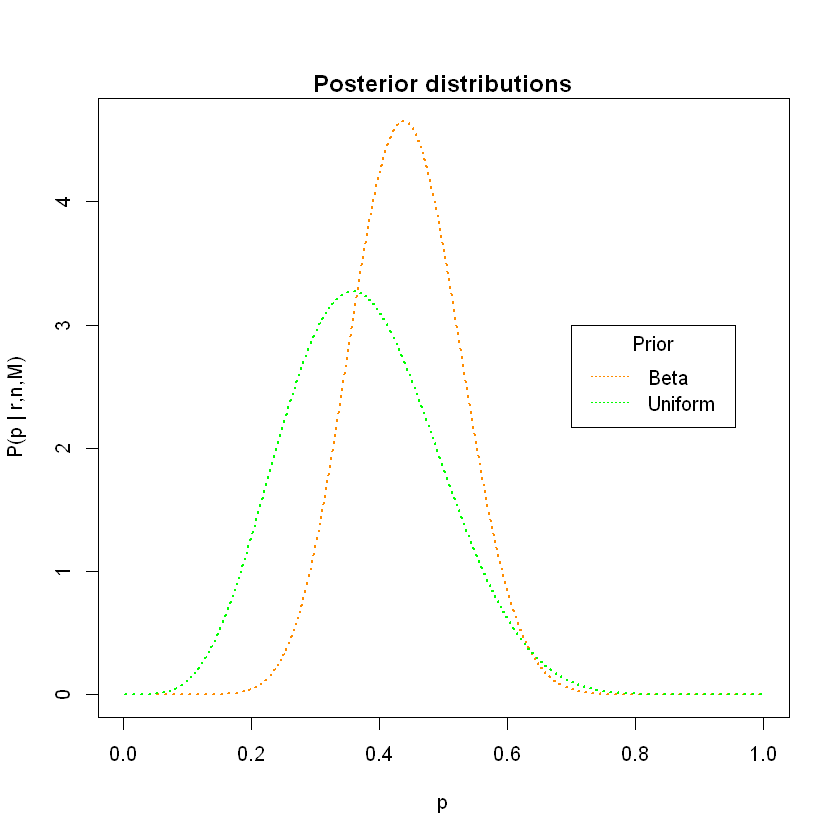



Number of coin tosses n=15
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45475 
95% credibility interval from 0.00025 to 0.59475
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40025 
95% credibility interval from 0.00025 to 0.60825

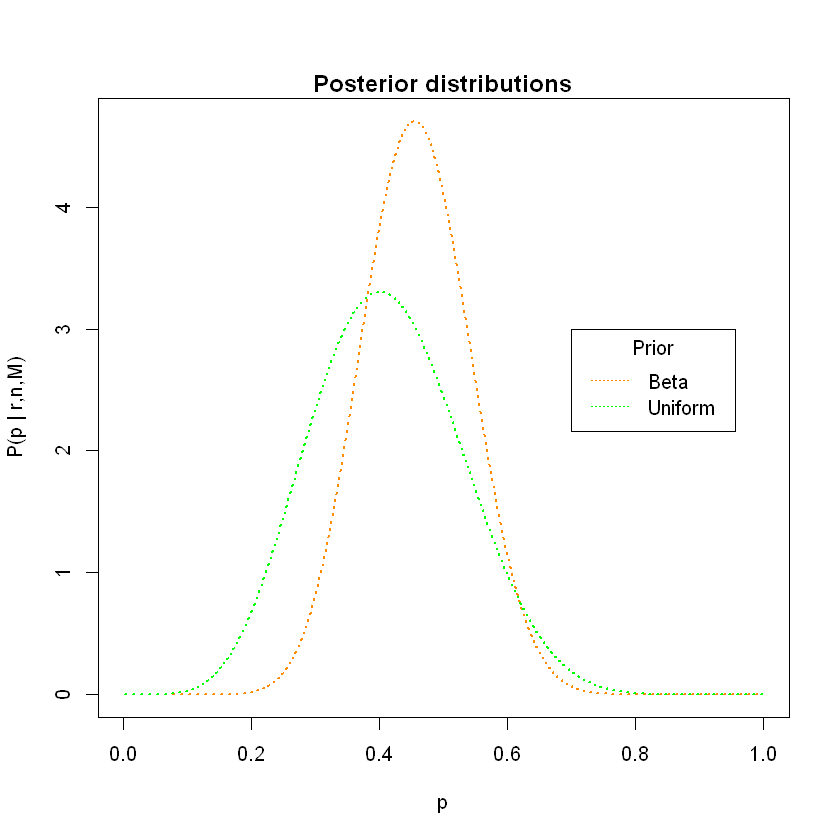



Number of coin tosses n=16
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.44125 
95% credibility interval from 0.00025 to 0.58025
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.37525 
95% credibility interval from 0.00025 to 0.57975

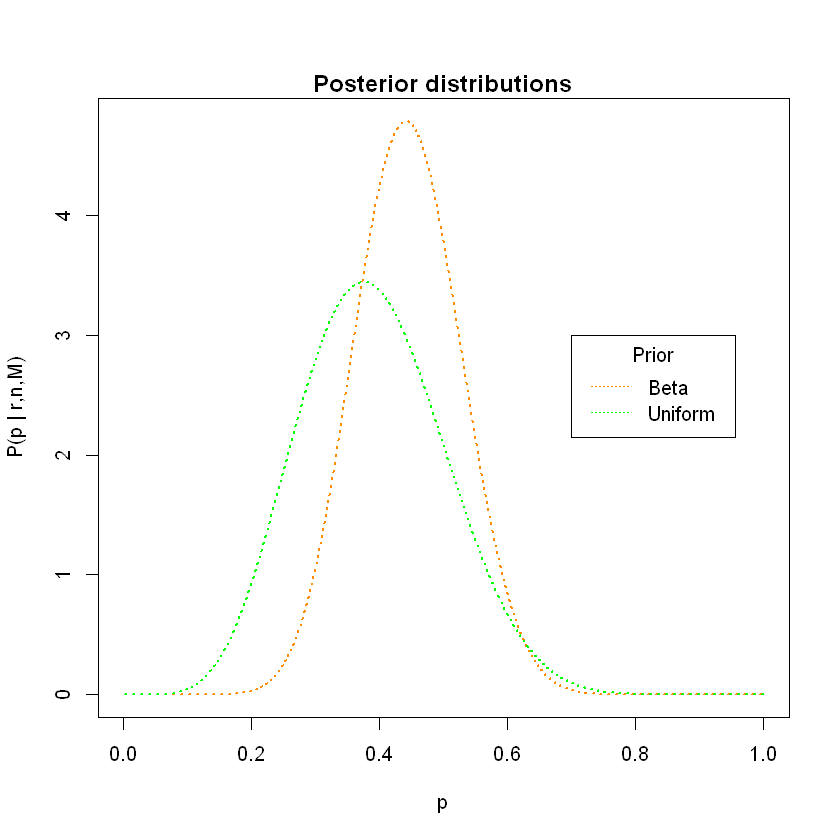



Number of coin tosses n=17
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45725 
95% credibility interval from 0.00025 to 0.59325
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.41175 
95% credibility interval from 0.00025 to 0.60725

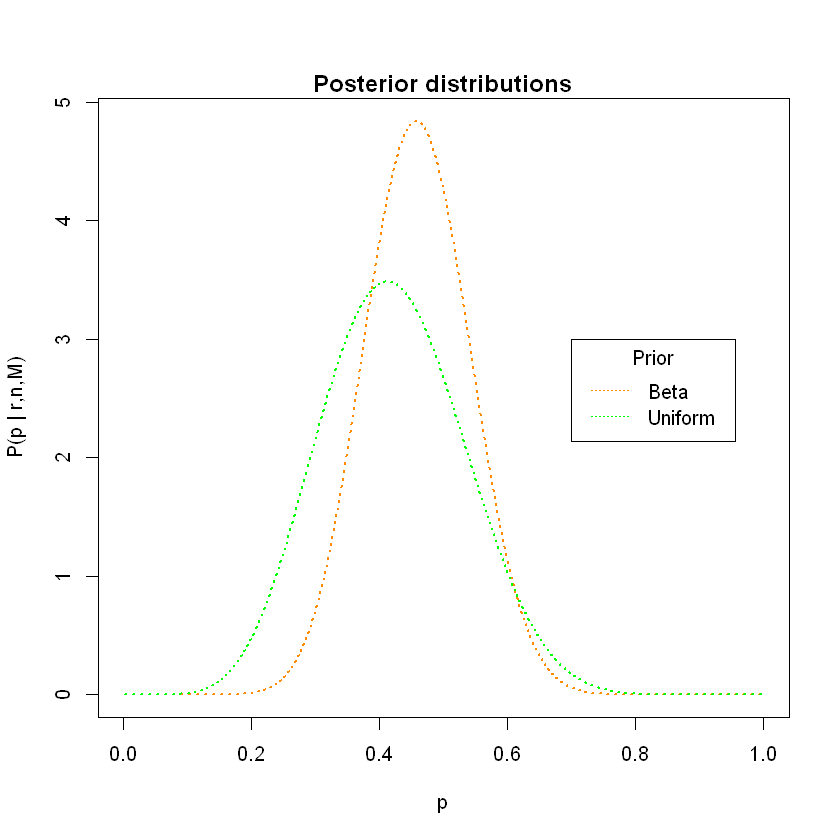



Number of coin tosses n=18
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.44425 
95% credibility interval from 0.00025 to 0.57975
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.38875 
95% credibility interval from 0.00025 to 0.58125

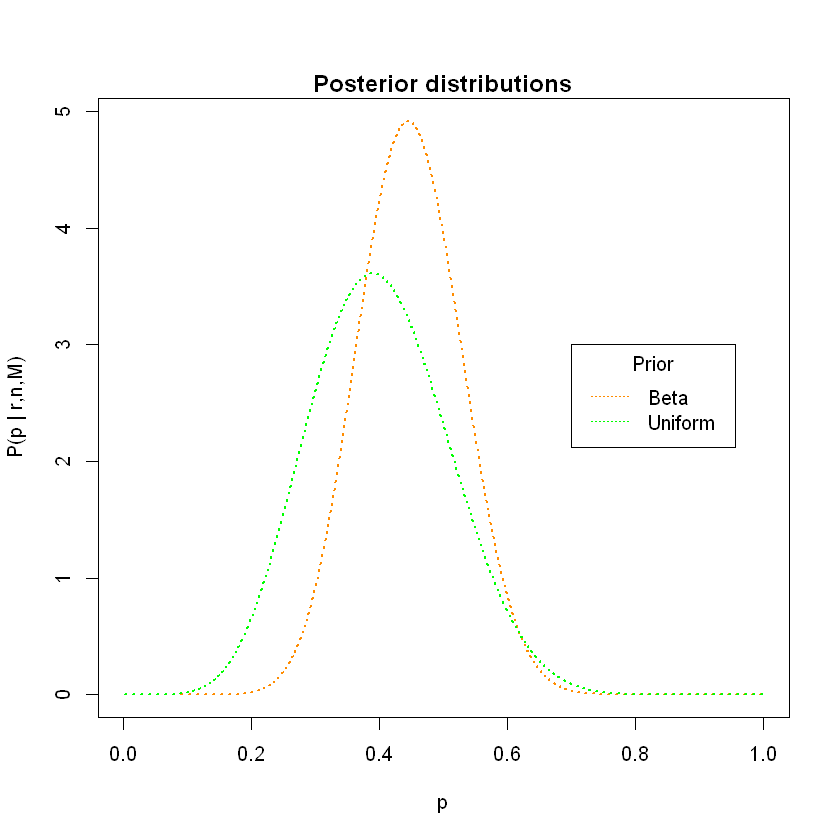



Number of coin tosses n=19
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45925 
95% credibility interval from 0.00025 to 0.59225
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.42125 
95% credibility interval from 0.00025 to 0.60575

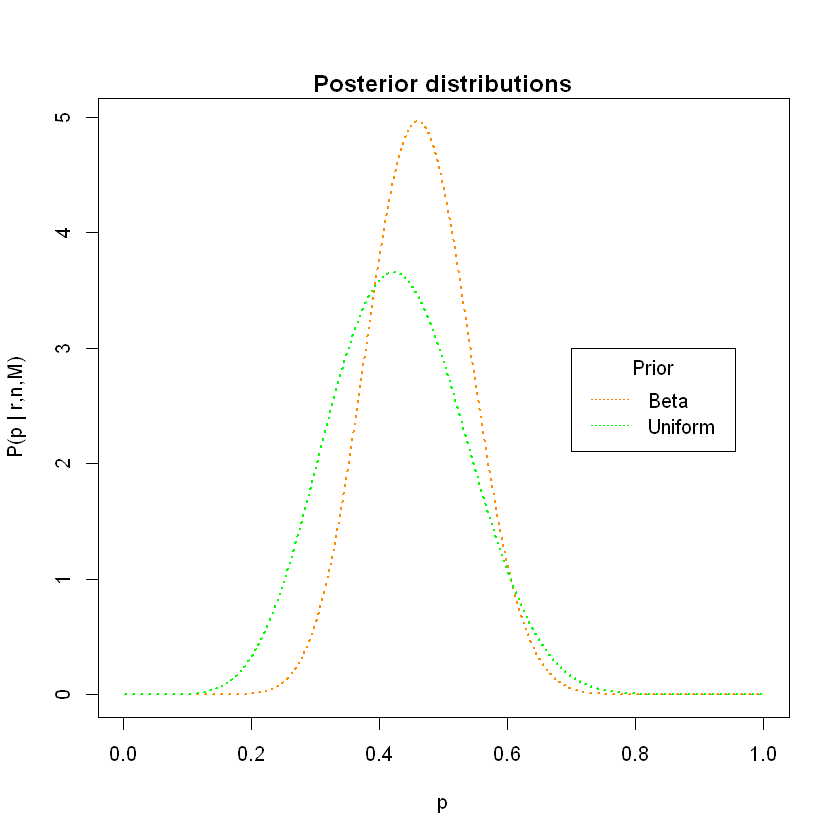



Number of coin tosses n=20
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.44725 
95% credibility interval from 0.00025 to 0.57875
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.40025 
95% credibility interval from 0.00025 to 0.58225

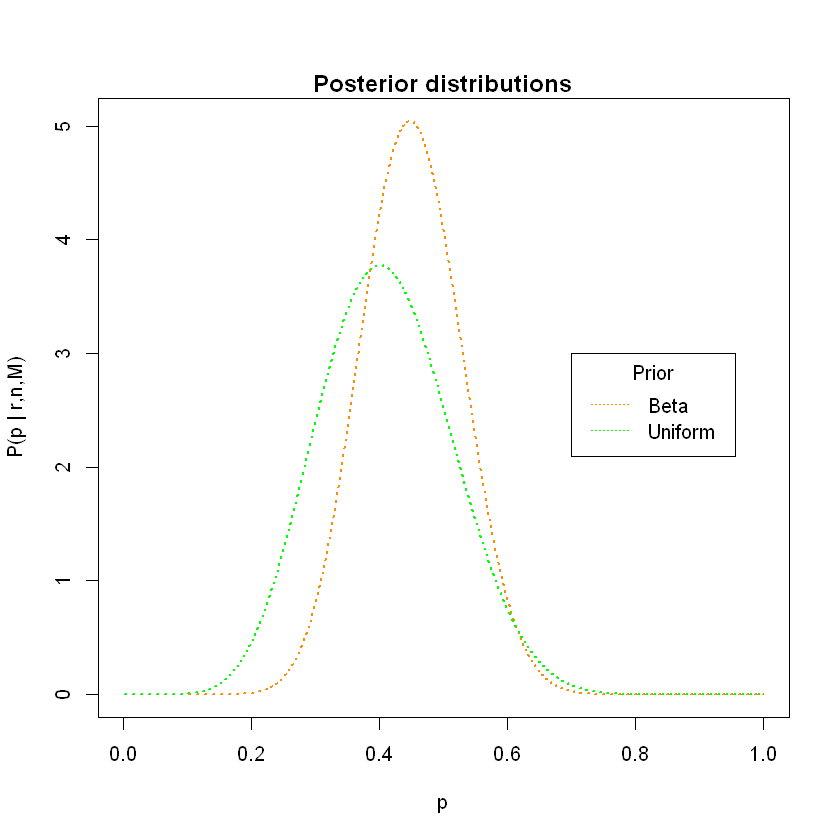



Number of coin tosses n=21
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46175 
95% credibility interval from 0.00025 to 0.59075
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.42875 
95% credibility interval from 0.00025 to 0.60425

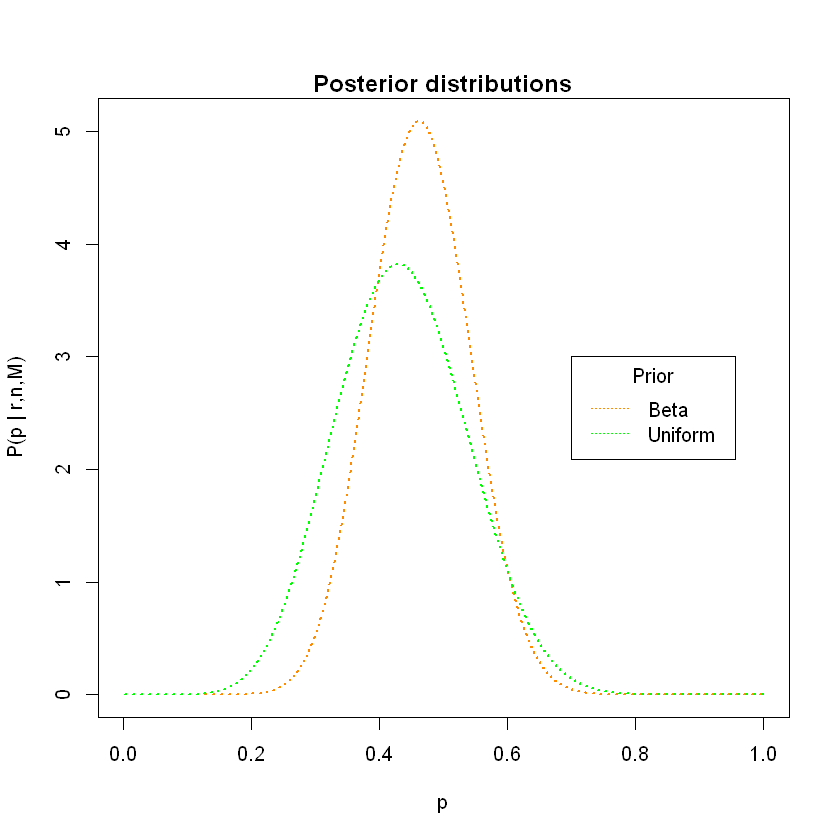



Number of coin tosses n=22
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.47525 
95% credibility interval from 0.00025 to 0.60175
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45475 
95% credibility interval from 0.00025 to 0.62425

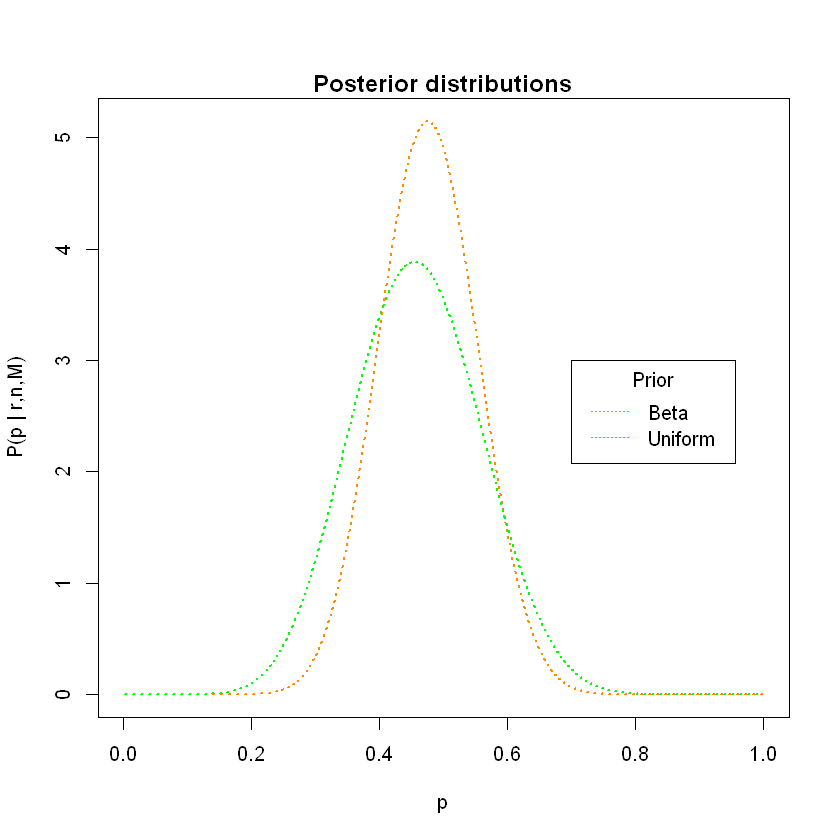



Number of coin tosses n=23
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46325 
95% credibility interval from 0.00025 to 0.58925
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.43475 
95% credibility interval from 0.00025 to 0.60275

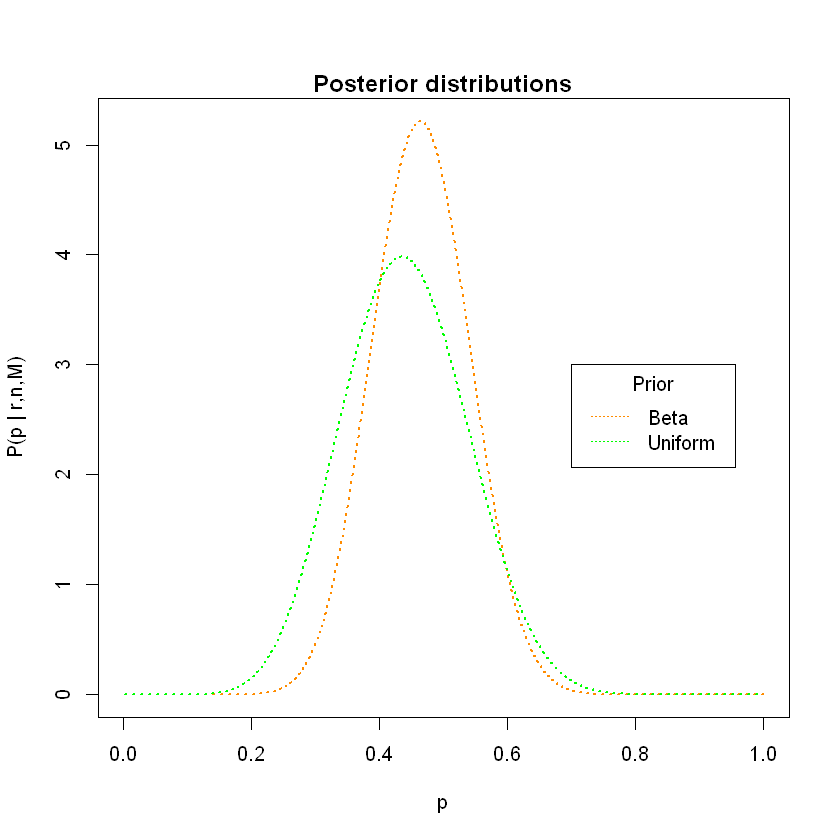



Number of coin tosses n=24
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.47625 
95% credibility interval from 0.00025 to 0.60025
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.45825 
95% credibility interval from 0.00025 to 0.62075

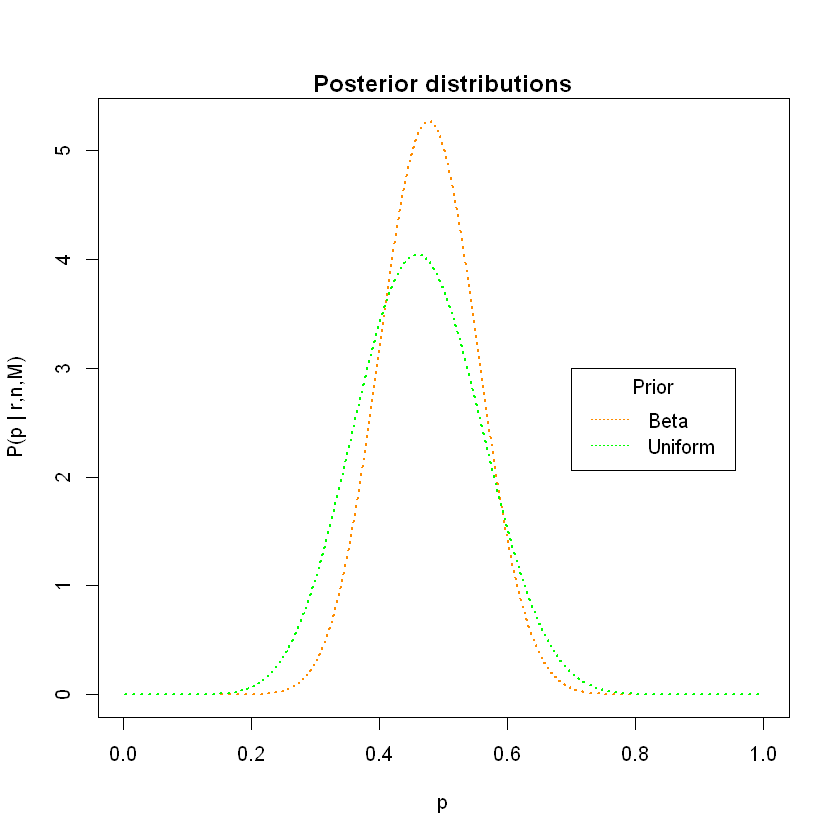



Number of coin tosses n=25
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46525 
95% credibility interval from 0.00025 to 0.58825
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.44025 
95% credibility interval from 0.00025 to 0.60125

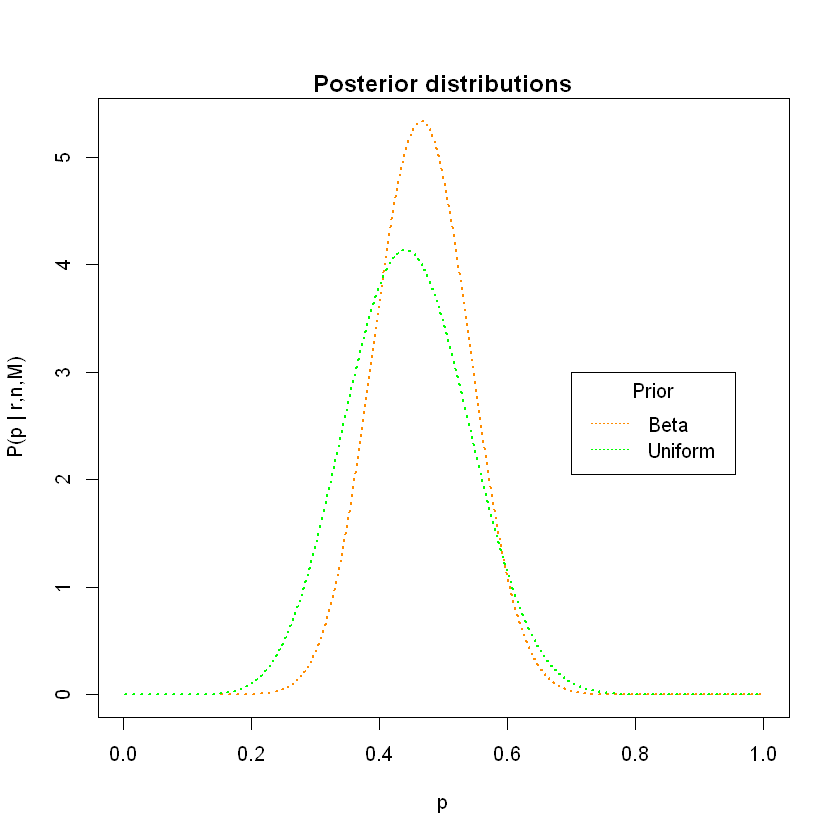



Number of coin tosses n=26
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.47725 
95% credibility interval from 0.00025 to 0.59825
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46175 
95% credibility interval from 0.00025 to 0.61775

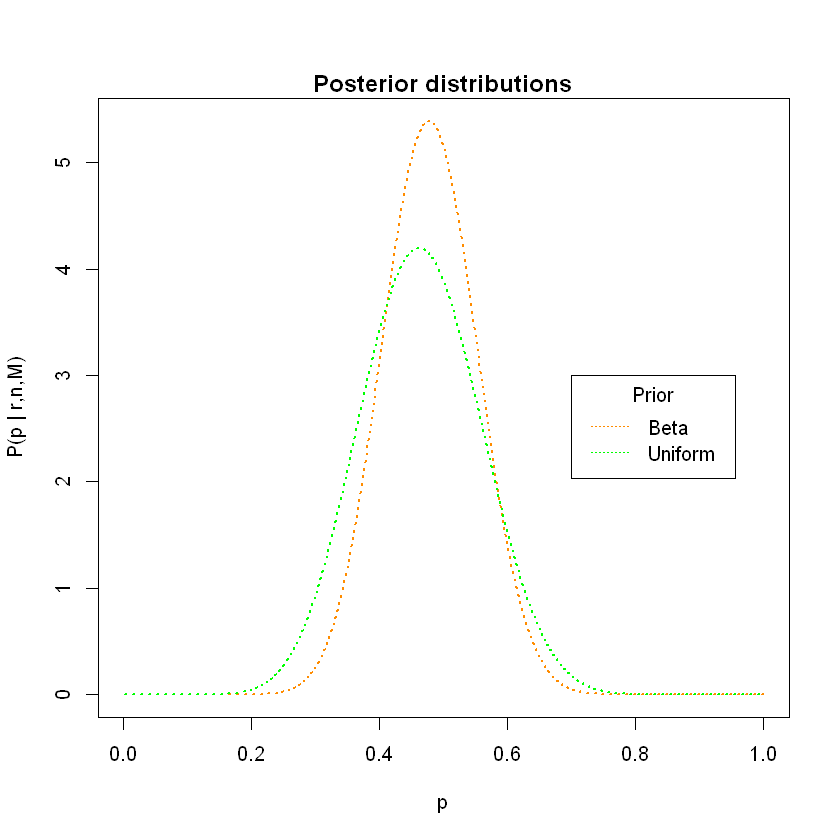



Number of coin tosses n=27
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46675 
95% credibility interval from 0.00025 to 0.58675
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.44425 
95% credibility interval from 0.00025 to 0.59925

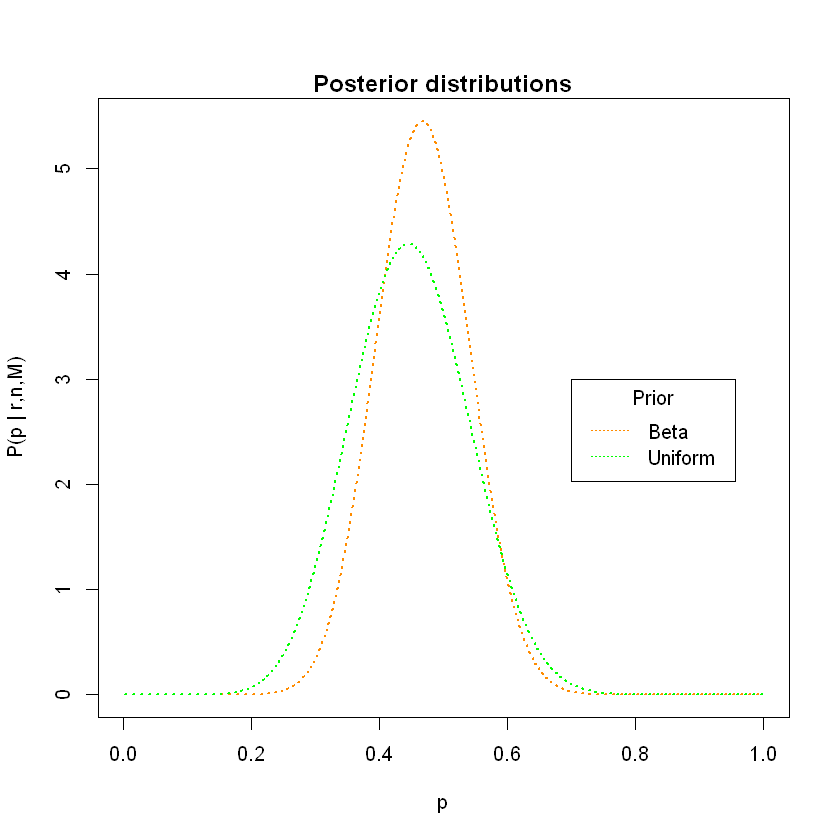



Number of coin tosses n=28
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.47825 
95% credibility interval from 0.00025 to 0.59675
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.46425 
95% credibility interval from 0.00025 to 0.61525

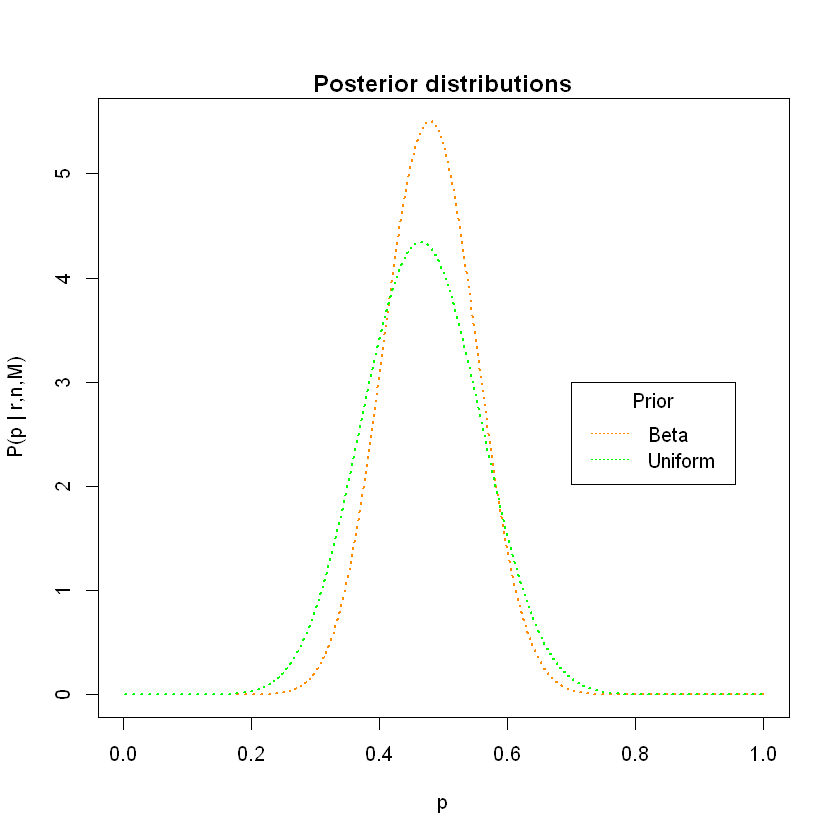



Number of coin tosses n=29
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.48925 
95% credibility interval from 0.00025 to 0.60575
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.48275 
95% credibility interval from 0.00025 to 0.62975

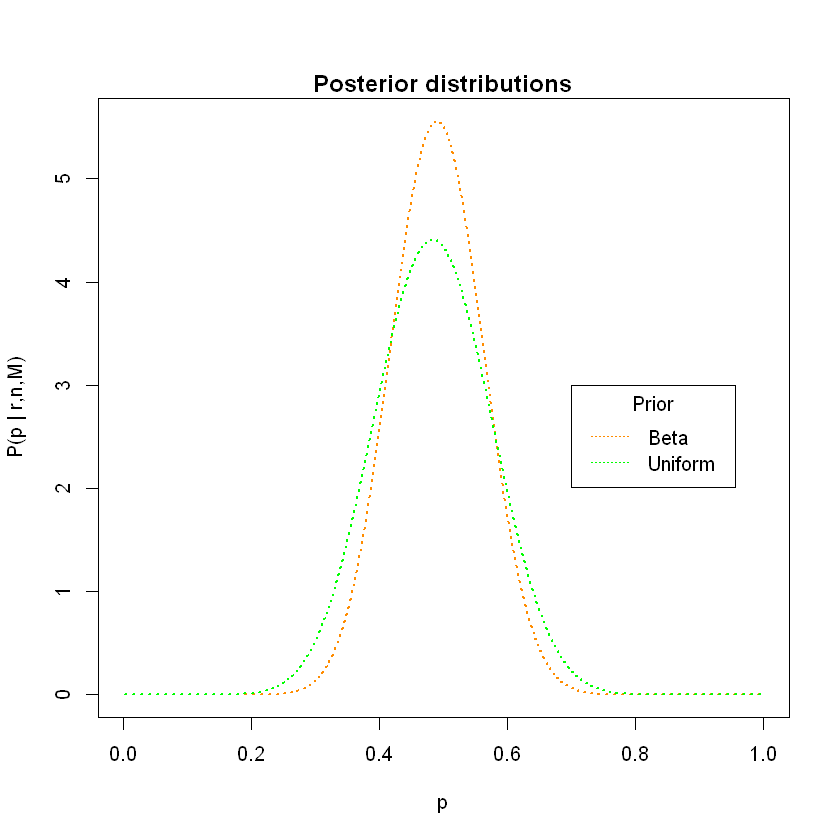



Number of coin tosses n=30
Beta Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.49975 
95% credibility interval from 0.00025 to 0.61475
Uniform Prior
Most probable value for the coin probability p (=probability of getting head in one toss): 0.49975 
95% credibility interval from 0.00025 to 0.64275

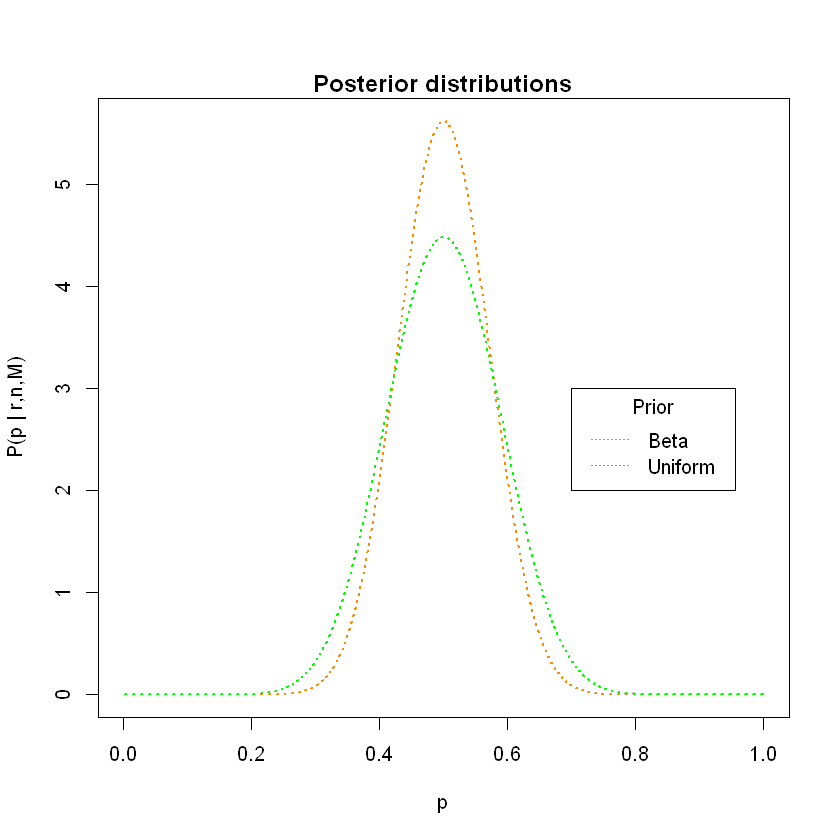

In [23]:
#Exercise 3

n.sample<-2000
delta.p<-1/n.sample
p<-seq(from=1/(2*n.sample), by=1/n.sample , length.out=n.sample)

alpha1<-10
beta1<-10
alpha2<-1
beta2<-1
R<-c(0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1)        # 0<-Tail  1<-Head


mode<-function(posterior){                             
    p[match(max(posterior), posterior)]
}
CI<-function(posterior){
    for(i in 1:2000){
        S<-delta.p*sum(head(posterior, -i))
        if(ceiling(S*100)==95){
            index<-2000-i
            return(index)
            break
        }
    }
}

for(j in 1:30){                      #Question c
    alpha1<-alpha1+R[j]
    beta1<-beta1+1-R[j]
    alpha2<-alpha2+R[j]
    beta2<-beta2+1-R[j]    
    
    beta.posterior<-dbeta(x=p, alpha1, beta1)
    uniform.posterior<-dbeta(x=p, alpha2, beta2)
    
    plot(p, beta.posterior, type="l", xlim=c(0,1), col="darkorange", lwd=2, lty=3, xlab="p", ylab=paste("P(p | r,n,M)"),)
    lines(p, uniform.posterior, col="green", lwd=2, lty=3)
    title(main="Posterior distributions", line=0.3, cex.main=1.2)
    legend(0.7, 3, legend=c("Beta", "Uniform"), col=c("darkorange", "green"), lty=3, title="Prior")
    
    cat("\n\nNumber of coin tosses n=", j, sep="")
    cat("\nBeta Prior")
    cat("\nMost probable value for the coin probability p (=probability of getting head in one toss):", mode(beta.posterior), 
    "\n95% credibility interval from", p[1], "to", p[CI(beta.posterior)])
    cat("\nUniform Prior")
    cat("\nMost probable value for the coin probability p (=probability of getting head in one toss):", mode(uniform.posterior), 
    "\n95% credibility interval from", p[1], "to", p[CI(uniform.posterior)])
}

#Question d: we get the same result

